In [11]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import ensemble #ансамбли

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

In [12]:
shoppers_data = pd.read_csv('online_shoppers_intention.zip')
shoppers_data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [13]:
dummy_data = pd.get_dummies(shoppers_data)
dummy_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [14]:
X, y = dummy_data.drop('Revenue', axis=1), dummy_data['Revenue']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = ensemble.RandomForestClassifier(random_state=42)

k_fold = model_selection.StratifiedKFold()

model_selection.cross_validate(model, X_train, y_train, cv=k_fold, scoring='f1', return_train_score=True)

{'fit_time': array([0.8545258 , 0.77222419, 0.80481005, 0.77604795, 0.789222  ]),
 'score_time': array([0.02372146, 0.0252254 , 0.03404045, 0.03376389, 0.02115703]),
 'test_score': array([0.64540338, 0.67518248, 0.65497076, 0.6179159 , 0.65441176]),
 'train_score': array([1.        , 0.99959033, 1.        , 1.        , 1.        ])}

In [15]:
from my_ds_lib import plot_learning_curve

model1 = ensemble.RandomForestClassifier(random_state=42, max_depth=5, n_estimators=200, min_samples_leaf=5)
model2 = ensemble.RandomForestClassifier(random_state=42, max_depth=7, n_estimators=200, min_samples_leaf=5)
model3 = ensemble.RandomForestClassifier(random_state=42, max_depth=12, n_estimators=200, min_samples_leaf=5)
#plot_learning_curve(model1, X_train, y_train, cv=k_fold, title='5')
#plot_learning_curve(model2, X_train, y_train, cv=k_fold, title='7')
#plot_learning_curve(model3, X_train, y_train, cv=k_fold, title='12')

In [16]:
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2084
        True       0.79      0.49      0.60       382

    accuracy                           0.90      2466
   macro avg       0.85      0.73      0.77      2466
weighted avg       0.89      0.90      0.89      2466



In [17]:
model_selection.cross_validate(model2, X_train, y_train, cv=k_fold, scoring='f1', return_train_score=True)

{'fit_time': array([1.0666728 , 0.95678115, 0.89706087, 0.93001556, 0.93978977]),
 'score_time': array([0.03185797, 0.02954817, 0.04222703, 0.03732991, 0.03132677]),
 'test_score': array([0.62948207, 0.64031621, 0.61506276, 0.59649123, 0.63654224]),
 'train_score': array([0.68181818, 0.67669173, 0.68059701, 0.7011214 , 0.6892489 ])}

In [18]:
y_cv_proba_pred = model_selection.cross_val_predict(model2, X_train, y_train, cv=k_fold, method='predict_proba')[:,1]
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)

Best threshold = 0.36, F1-Score = 0.69


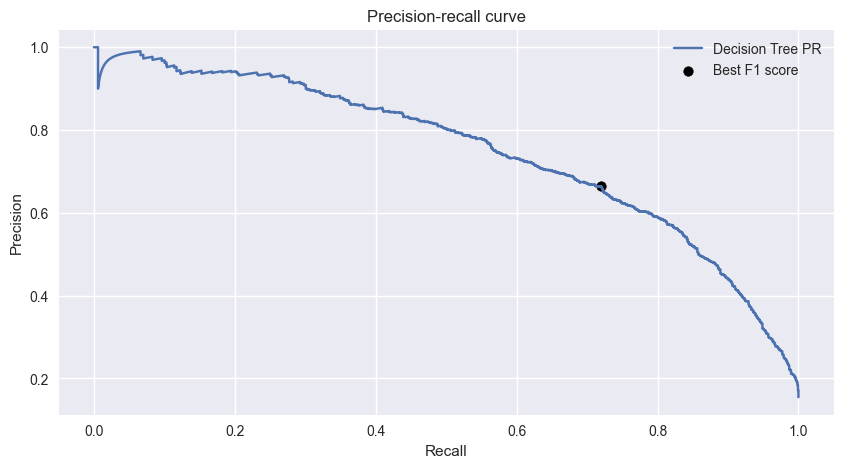

In [19]:
#Вычисляем F1-меру при различных threshold
f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим линейный график зависимости precision от recall
ax.plot(recall, precision, label='Decision Tree PR')
#Отмечаем точку максимума F1
ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')
#Даем графику название и подписи осям
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend()

In [20]:
y_pred = y_cv_proba_pred > 0.36
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.93      0.94      8338
        True       0.66      0.72      0.69      1526

    accuracy                           0.90      9864
   macro avg       0.81      0.83      0.82      9864
weighted avg       0.90      0.90      0.90      9864

